# SGD Classifier

In [218]:
import pickle
import numpy as np
import pandas as pd
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import stop_words
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

use https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

### Load data

In [219]:
df = pd.read_csv("data/mixed_data_1200.csv", sep=';')
df = df.drop(["Unnamed: 0"],axis=1)
df.head(5)

,target,text
0,0,@Starrbby too bad I won't be around I lost my ...
1,0,amazon s3 plugin not worked in my website . it...
2,0,The Hoyts Distribution NZ website isn't workin...
3,0,dang won't be able to get to any workshops run...
4,0,Tried to install a Twitter-application on my p...


In [220]:
print(len(stop_words.ENGLISH_STOP_WORDS))
stopwords = stop_words.ENGLISH_STOP_WORDS

318


### Tokenize data

In [289]:
tokenizer = Tokenizer(lower=True, filters = "!\"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n", split = " ")
tokenizer.fit_on_texts(X_load)

In [291]:
# summarize what was learned
print(tokenizer.word_counts) #word_counts: A dictionary of words and their counts.
#print(tokenizer.document_count) #document_count:An integer count of the total number of documents that were used to fit the Tokenizer.
#print(tokenizer.word_index) #word_index: A dictionary of words and their uniquely assigned integers.
#print(tokenizer.word_docs) #word_docs: A dictionary of words and how many documents each appeared in.

OrderedDict([('starrbby', 1), ('too', 76), ('bad', 40), ('i', 944), ("won't", 45), ('be', 192), ('around', 12), ('lost', 24), ('my', 751), ('job', 52), ('and', 703), ("can't", 86), ('even', 32), ('pay', 15), ('phone', 363), ('bill', 9), ('lmao', 1), ('aw', 2), ('shucks', 1), ('amazon', 2), ('s3', 1), ('plugin', 1), ('not', 282), ('worked', 42), ('in', 648), ('website', 117), ('it', 414), ('need', 70), ('php', 3), ('5', 32), ('but', 240), ('hosting', 3), ('provider', 1), ('has', 82), ('only', 70), ('4', 31), ('very', 32), ('sad', 35), ('the', 1052), ('hoyts', 1), ('distribution', 1), ('nz', 1), ("isn't", 52), ('working', 314), ('for', 741), ('me', 251), ('great', 145), ('to', 1262), ('like', 96), ('this', 295), ('when', 57), ('most', 14), ('dang', 4), ('able', 10), ('get', 158), ('any', 37), ('workshops', 1), ('run', 12), ('by', 100), ('web', 64), ('directions', 2), ('tried', 21), ('install', 5), ('a', 746), ('twitter', 86), ('application', 11), ('on', 609), ("didn't", 39), ('work', 678

In [247]:
df.head(5)
#converts whitespaces
trb_nan_idx = df[pd.isnull(df['text'])].index.tolist()
df.loc[trb_nan_idx, 'text'] = ' '

In [270]:
# integer encode documents // standard bag-of-words of length vocab size => len(t.word_index) = 7282
encoded_tweets = tokenizer.texts_to_matrix(X_load, mode='tfidf') #binary / count / tfidf / freq
print(encoded_tweets)

[[0.         2.08679892 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.23249706 1.24328553 ... 0.         0.         0.        ]
 ...
 [0.         0.         1.24328553 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [321]:
dfidf_df = pd.DataFrame(data=encoded_tweets)
#dfidf_df.to_latex()

,0,1,2,3,4,5,6,7,8,9,...,7272,7273,7274,7275,7276,7277,7278,7279,7280,7281
0,0.0,2.086799,0.000000,2.116666,0.000000,0.000000,0.000000,0.000000,1.537202,1.597749,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,2.116666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.232497,1.243286,0.000000,1.286452,0.000000,0.000000,0.000000,1.537202,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,2.105065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,1.243286,1.250137,0.000000,1.147442,1.566776,1.531666,0.000000,1.597749,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,1.243286,1.250137,0.000000,1.147442,1.566776,1.531666,0.000000,1.597749,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,1.243286,1.250137,1.286452,1.147442,0.000000,0.000000,0.000000,1.597749,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.000000,0.000000,1.286452,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,1.243286,0.000000,0.000000,0.000000,1.566776,0.000000,1.537202,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,2.105065,0.000000,0.000000,1.147442,1.566776,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[0, 1, -1]

In [327]:
dflatex1 = dfidf_df.iloc[[0,1,2,3,-3,-2,-1], [0,1,2,3,-3,-2,-1]]
print(dflatex1.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  0    &      1    &      2    &      3    &  7279 &  7280 &  7281 \\
\midrule
0    &   0.0 &  2.086799 &  0.000000 &  2.116666 &   0.0 &   0.0 &   0.0 \\
1    &   0.0 &  0.000000 &  0.000000 &  2.116666 &   0.0 &   0.0 &   0.0 \\
2    &   0.0 &  1.232497 &  1.243286 &  0.000000 &   0.0 &   0.0 &   0.0 \\
3    &   0.0 &  0.000000 &  2.105065 &  0.000000 &   0.0 &   0.0 &   0.0 \\
3555 &   0.0 &  0.000000 &  1.243286 &  0.000000 &   0.0 &   0.0 &   0.0 \\
3556 &   0.0 &  0.000000 &  0.000000 &  0.000000 &   0.0 &   0.0 &   0.0 \\
3557 &   0.0 &  0.000000 &  0.000000 &  0.000000 &   0.0 &   0.0 &   0.0 \\
\bottomrule
\end{tabular}



In [271]:
X_traink,X_testk,y_traink,y_testk = train_test_split(encoded_tweets,Y_load,test_size=0.2,random_state=42,shuffle=True)

In [272]:
len(encoded_tweets)

3558

In [275]:
len(encoded_tweets[0]) #with length of voab size

7282

In [251]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
#reverse_word_map

In [276]:
# Function takes a tokenized sentence and returns the words
def sequence_to_text(list_of_indices):
    # Looking up words in dictionary
    #words = [reverse_word_map.get(list_of_indices.indexOf(letter)) for letter in list_of_indices if letter>0]
    words = []
    count = 0
    for letter in list_of_indices:
        if letter >0:
            words.append(reverse_word_map.get(count))
        count+=1
        #print(count)
    return(words)

text = encoded_tweets[0]
print(text)
# Creating texts 
my_texts =  list(map(sequence_to_text, [encoded_tweets[0]]))
my_texts[0]

[0.         2.08679892 0.         ... 0.         0.         0.        ]


['i',
 'my',
 'and',
 'phone',
 'be',
 'job',
 "can't",
 'too',
 "won't",
 'bad',
 'even',
 'lost',
 'around',
 'pay',
 'bill',
 'aw',
 'lmao',
 'starrbby',
 'shucks']

### Split data into train/test set

In [253]:
X_load = df["text"]
Y_load = df["target"]
X_train,X_test,y_train,y_test = train_test_split(X_load,Y_load,test_size=0.2,random_state=42,shuffle=True)

### Vectorize Data

In [254]:
count_vect = CountVectorizer(stop_words='english',ngram_range=(1, 1))
X_train_counts = count_vect.fit_transform(X_train.values.astype('U'))
X_test_counts = count_vect.transform(X_test.values.astype('U'))
X_train_counts.shape

(2846, 6033)

### TF-IDF Data

In [255]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_train_tfidf.shape

(2846, 6033)

### Train model

In [256]:
svmClassifier =  SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
svmClassifier.fit(X_train_tfidf, y_train)
svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
svm.fit(X_traink, y_train)

/Users/ChrisChross/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

### Predict
use the unlabled data

In [257]:
predictions = svmClassifier.predict(X_test_tfidf)
predictions2 = svm.predict(X_testk)

In [258]:
xxx = ["Today my PC crashed what a shit I can not work I am so stressed"]

In [259]:
xxx1 = count_vect.transform(xxx)
xxx2 = tfidf_transformer.transform(xxx1)
pred = svmClassifier.predict(xxx2)
pred

array([0])

### Evaluate

In [260]:
np.mean(predictions == y_test) #accuracy

0.9157303370786517

In [261]:
np.mean(predictions2 == y_testk) #accuracy

0.9199438202247191

In [269]:
print(metrics.classification_report(y_test, predictions,target_names=["techno-stress","neutral","positive"]))
report = metrics.classification_report(y_test, predictions,target_names=["techno-stress","neutral","positive"],output_dict=True)
reportdf = pd.DataFrame(report).transpose()
print(reportdf.to_latex())

               precision    recall  f1-score   support

techno-stress       0.96      0.99      0.97       268
      neutral       0.83      0.98      0.90       222
     positive       0.98      0.77      0.86       222

    micro avg       0.92      0.92      0.92       712
    macro avg       0.92      0.91      0.91       712
 weighted avg       0.93      0.92      0.91       712

\begin{tabular}{lrrrr}
\toprule
{} &  f1-score &  precision &    recall &  support \\
\midrule
techno-stress &  0.972376 &   0.960000 &  0.985075 &    268.0 \\
neutral       &  0.897119 &   0.825758 &  0.981982 &    222.0 \\
positive      &  0.860759 &   0.982659 &  0.765766 &    222.0 \\
micro avg     &  0.915730 &   0.915730 &  0.915730 &    712.0 \\
macro avg     &  0.910085 &   0.922806 &  0.910941 &    712.0 \\
weighted avg  &  0.914109 &   0.925209 &  0.915730 &    712.0 \\
\bottomrule
\end{tabular}



#### Learning Curve

/Users/ChrisChross/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ChrisChross/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


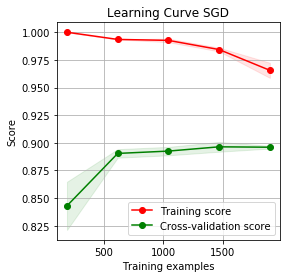

In [265]:
learn1 = skplt.estimators.plot_learning_curve(svmClassifier, X_train_tfidf, y_train,figsize=(4,4))
plt.title("Learning Curve SGD")
plt.show()

#### Confusion Matrix 

<Figure size 432x288 with 0 Axes>

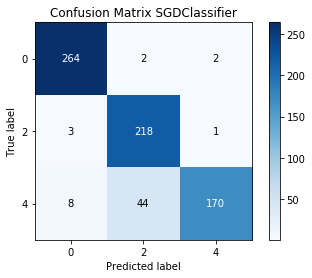

In [267]:
plt.figure()
skplt.metrics.plot_confusion_matrix(y_test,predictions,normalize=False)
#cnf_matrix = metrics.confusion_matrix(y_test, predictions)
plt.title("Confusion Matrix SGDClassifier")
plt.show()